---
#Import libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

---
#Read and display data

Import training dataset

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Import testing dataset

In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---
#Explore the data

**Get information about the features of data** <br>
Training data:

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Testing data:

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Get description of data** <br>
Training data:

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Testing data:

In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


---
#Visualize and Gain insights from data

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

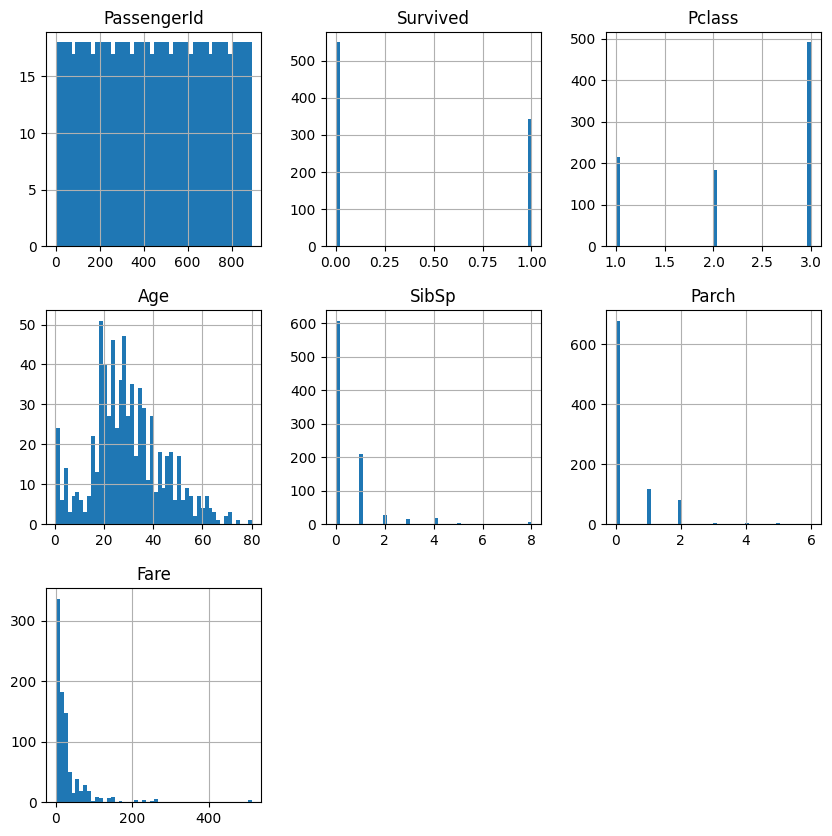

In [8]:
train_data.hist(bins = 50, figsize=(10, 10))

In [9]:
# Make a copy of training dataset
train_copy = train_data.copy()

**Survived by class:**

<Axes: title={'center': 'Survived per class'}>

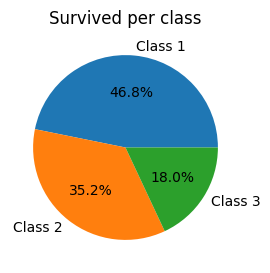

In [10]:
byclass = train_copy.groupby("Pclass").Survived.sum()/train_copy.groupby("Pclass").Survived.count()
byclass.plot.pie(labels = ['Class 1', 'Class 2', 'Class 3'], autopct='%1.1f%%', ylabel = '', title = 'Survived per class', figsize=(3, 3))

**Survived by age:**

<Axes: title={'center': 'Survived per age'}>

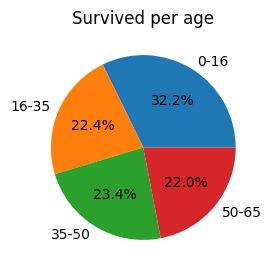

In [11]:
train_copy["Age_cat"] = pd.cut(train_copy.Age, [0, 16, 35, 50, 65])
byage = train_copy.groupby("Age_cat").Survived.sum()/train_copy.groupby("Age_cat").Survived.count()
byage.plot.pie(labels = ['0-16', '16-35', '35-50', '50-65'], autopct='%1.1f%%', ylabel = '', title = 'Survived per age', figsize=(3, 3))

**Survived by fare:**

<Axes: title={'center': 'Survived per fare'}>

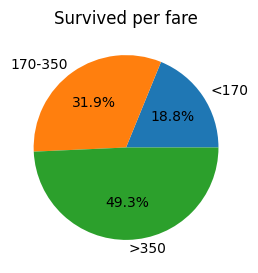

In [12]:
train_copy["Fare_cat"] = pd.cut(train_copy.Fare, [train_copy.Fare.min(), 170, 350, train_copy.Fare.max()])
byage = train_copy.groupby("Fare_cat").Survived.sum()/train_copy.groupby("Fare_cat").Survived.count()
byage.plot.pie(labels = ['<170', '170-350', '>350'], autopct='%1.1f%%', ylabel = '', title = 'Survived per fare', figsize=(3, 3))

**Survived by sex:**

In [13]:
bysex = train_copy.groupby("Sex").Survived.sum()/train_copy.groupby("Sex").Survived.count()*100
bysex

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Text(0, 0.5, 'Percent of survived')

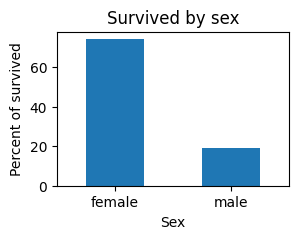

In [14]:
plt.figure(figsize=(3,2))
bysex.plot(kind="bar", title="test")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Survived by sex")
plt.xlabel("Sex")
plt.ylabel("Percent of survived")

**Survived by number of siblings/spouses aboard:**

Text(0, 0.5, 'Percent of survived')

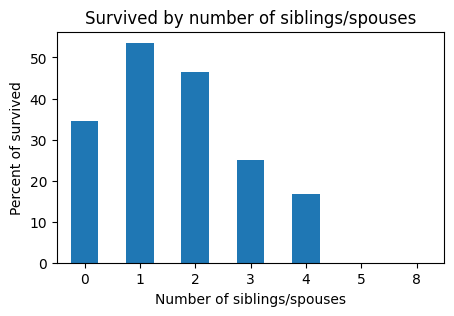

In [15]:
bysibsp = train_copy.groupby("SibSp").Survived.sum()/train_copy.groupby("SibSp").Survived.count()*100
plt.figure(figsize=(5,3))
bysibsp.plot(kind="bar", title="test")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Survived by number of siblings/spouses")
plt.xlabel("Number of siblings/spouses")
plt.ylabel("Percent of survived")

**Survived by number of parents/children aboard:**

Text(0, 0.5, 'Percent of survived')

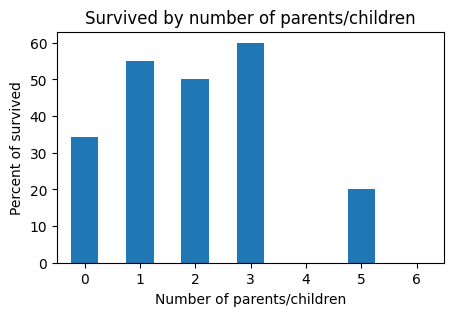

In [16]:
byparch = train_copy.groupby("Parch").Survived.sum()/train_copy.groupby("Parch").Survived.count()*100
plt.figure(figsize=(5,3))
byparch.plot(kind="bar", title="test")
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Survived by number of parents/children")
plt.xlabel("Number of parents/children")
plt.ylabel("Percent of survived")

---
#Split the data

In [17]:
#I perform a stratified split on the passenger class because of its correlation with the survival
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=0)

---
#Transformation pipeline

*Extract num values*

In [20]:
train_num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

*Get all column names from train_set*

In [21]:
all_columns = train_set.columns.tolist()

*Pipelines*

In [22]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('min_max_scaler', MinMaxScaler()),
    ])

In [59]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_num),
        ("cat", OneHotEncoder(), ["Sex"]),
    ])

In [24]:
#column_names = train_copy.columns.tolist()
#column_names.remove('Sex')
#column_names = column_names + ["Female", "Male"]

---
#Cross-validation and fine-tuning

In [62]:
# Transform the training dataset
train_prepared = full_pipeline.fit_transform(train_set)
val_prepared = full_pipeline.transform(val_set)

# Define train and validation label sets
train_labels = train_set["Survived"].copy()
val_labels = val_set["Survived"].copy()

In [ ]:
# Define a list of classifiers with parameter grids for tuning
classifiers = [
    ("Random Forest", RandomForestClassifier(),
     {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}),
    ("Gradient Boosting", GradientBoostingClassifier(),
     {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 4, 5]}),
    ("Support Vector Machine", SVC(probability=True),
     {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ("K-Nearest Neighbors", KNeighborsClassifier(),
     {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    ("Logistic Regression", LogisticRegression(max_iter=1000),
     {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    ("SGD", SGDClassifier(),
     {'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01], 'loss': ['log_loss', 'modified_huber']}),
    ("Naive Bayes", GaussianNB(), {}),
    ("KNeighbors", KNeighborsClassifier(),
     {'n_neighbors': [3, 5, 7]}),
    ("Neural Network", MLPClassifier(max_iter=1000),
     {'hidden_layer_sizes': [(100,), (100,50), (200,)], 'alpha': [0.00001, 0.0001, 0.001]})
]

# Create a DataFrame to store results
results = pd.DataFrame(columns=["Classifier", "Best Params", "Train Accuracy", "Test Accuracy", "Mean AUC"])

# Benchmark each classifier using cross-validation and parameter tuning
for name, clf, param_grid in classifiers:

    grid_search = GridSearchCV(clf, param_grid, cv=5)
    #grid_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5)

    # Calculate cross-validated accuracy with parameter tuning
    scores = cross_val_score(grid_search, train_prepared, train_labels, cv=5)
    train_accuracy = np.mean(scores)

    # Calculate ROC curve and AUC
    print("Calculating ROC curve and AUC...")
    grid_search.fit(train_prepared, train_labels)
    best_estimator = grid_search.best_estimator_

    train_probas = best_estimator.predict_proba(train_prepared)
    fpr, tpr, _ = roc_curve(train_labels, train_probas[:, 1])
    train_auc = auc(fpr, tpr)

    # Evaluate on test dataset
    test_accuracy = accuracy_score(val_labels, best_estimator.predict(val_prepared))

    best_params = grid_search.best_params_

    results = results.append({"Classifier": name, "Best Params": best_params, "Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy, "Mean AUC": train_auc}, ignore_index=True)

    print(f"{name} processed.\n")

# Display the benchmark results in a readable format
print("\nBenchmark Results:")
print(results)

---
#Record the best model

Taken into account the report from the cross-validation:
```
Benchmark Results:
               Classifier                                        Best Params  \
0           Random Forest              {'max_depth': 10, 'n_estimators': 50}   
1       Gradient Boosting              {'max_depth': 3, 'n_estimators': 150}   
2  Support Vector Machine                         {'C': 10, 'kernel': 'rbf'}   
3     K-Nearest Neighbors           {'n_neighbors': 7, 'weights': 'uniform'}   
4     Logistic Regression                          {'C': 1, 'penalty': 'l2'}   
5                     SGD  {'alpha': 0.001, 'loss': 'modified_huber', 'pe...   
6             Naive Bayes                                                 {}   
7              KNeighbors                                 {'n_neighbors': 7}   
8          Neural Network     {'alpha': 1e-05, 'hidden_layer_sizes': (100,)}   

   Train Accuracy  Test Accuracy  Mean AUC  
0        0.817384       0.843575  0.983312  
1        0.815976       0.821229  0.964676  
2        0.820221       0.804469  0.853238  
3        0.797715       0.826816  0.918884  
4        0.793529       0.776536  0.849567  
5        0.801960       0.804469  0.848932  
6        0.797774       0.793296  0.836942  
7        0.803349       0.826816  0.918884  
8        0.820230       0.826816  0.870368
```
the best generalizing model appears to be Random Forest Classifier with max_depth = 10, and n_estimators = 50.

In [65]:
# Train the gradient boosting classifier on full-size training data
model = RandomForestClassifier(max_depth = 10, n_estimators = 50)
model.fit(train_prepared, train_labels)

RandomForestClassifier(max_depth=10, n_estimators=50)